In [13]:
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import matplotlib.font_manager as fm

path = r"C:\Windows\Fonts\malgun.ttf"
fontprop = fm.FontProperties(fname=path)

def create_sample_data():
    """분석용 샘플 데이터 생성"""
    np.random.seed(42)
    
    categories = ['기술', '경제', '문화', '스포츠', '정치']
    sources = ['뉴스A', '뉴스B', '뉴스C', '뉴스D']
    
    sample_data = []
    
    for i in range(100):
        title = f"뉴스 제목 {i+1}: {np.random.choice(categories)} 관련 기사"
        
        # 제목에 특정 키워드 추가
        if '기술' in title:
            title += " AI, 빅데이터, 클라우드"
        elif '경제' in title:
            title += " 주식, 투자, 금리"
        elif '문화' in title:
            title += " 예술, 음악, 영화"
        
        sample_data.append({
            'title': title,
            'category': np.random.choice(categories),
            'source': np.random.choice(sources),
            'views': np.random.randint(100, 10000),
            'comments': np.random.randint(0, 500),
            'date': pd.date_range('2024-01-01', periods=30, freq='D')[i % 30],
            'content_length': np.random.randint(500, 3000)
        })
    
    return pd.DataFrame(sample_data)

def data_preprocessing(df):
    """데이터 전처리 함수"""
    print("📊 원본 데이터 정보:")
    print(f"- 총 레코드 수: {len(df)}")
    print(f"- 컬럼 수: {len(df.columns)}")
    print(f"- 결측값: {df.isnull().sum().sum()}개")
    
    # 1. 결측값 처리
    df_clean = df.copy()
    df_clean = df_clean.dropna()
    
    # 2. 중복 제거
    initial_count = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=['title'])
    removed_count = initial_count - len(df_clean)
    if removed_count > 0:
        print(f"✅ {removed_count}개 중복 레코드 제거")
    
    # 3. 날짜 형식 통일
    df_clean['date'] = pd.to_datetime(df_clean['date'])
    
    # 4. 텍스트 정제 (제목)
    df_clean['title_clean'] = df_clean['title'].apply(clean_text)
    
    # 5. 파생 변수 생성
    df_clean['engagement_ratio'] = df_clean['comments'] / (df_clean['views'] + 1)
    df_clean['date_str'] = df_clean['date'].dt.strftime('%Y-%m-%d')
    df_clean['weekday'] = df_clean['date'].dt.day_name()
    
    print(f"✅ 전처리 완료: {len(df_clean)}개 레코드")
    
    return df_clean

def clean_text(text):
    """텍스트 정제 함수"""
    if pd.isna(text):
        return ""
    
    # 특수문자 제거 (한글, 영문, 숫자, 공백만 유지)
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', str(text))
    
    # 연속된 공백을 하나로 변경
    text = re.sub(r'\s+', ' ', text)
    
    # 앞뒤 공백 제거
    text = text.strip()
    
    return text

def extract_keywords(text_series):
    """키워드 추출 함수"""
    # 모든 텍스트를 하나로 합치기
    all_text = ' '.join(text_series.astype(str))
    
    # 단어 분리 (간단한 공백 기준)
    words = all_text.split()
    
    # 불용어 제거 (간단한 예시)
    stop_words = {'의', '가', '이', '은', '는', '을', '를', '에', '와', '과', '으로', '로', '에서', '와', '과', '뉴스', '기사', '관련'}
    words = [word for word in words if len(word) > 1 and word not in stop_words]
    
    # 빈도 계산
    word_freq = Counter(words)
    
    return word_freq.most_common(20)

# 데이터 생성 및 전처리 실행
sample_df = create_sample_data()
clean_df = data_preprocessing(sample_df)

print("\n📋 전처리된 데이터 미리보기:")
print(clean_df.head())

print("\n🔍 기본 통계:")
print(clean_df.describe())

📊 원본 데이터 정보:
- 총 레코드 수: 100
- 컬럼 수: 7
- 결측값: 0개
✅ 전처리 완료: 100개 레코드

📋 전처리된 데이터 미리보기:
                          title category source  views  comments       date  \
0            뉴스 제목 1: 스포츠 관련 기사       정치    뉴스C   5291       188 2024-01-01   
1  뉴스 제목 2: 경제 관련 기사 주식, 투자, 금리       문화    뉴스C   4526       458 2024-01-02   
2             뉴스 제목 3: 정치 관련 기사      스포츠    뉴스D   8422       149 2024-01-03   
3            뉴스 제목 4: 스포츠 관련 기사       경제    뉴스D   5151       276 2024-01-04   
4            뉴스 제목 5: 스포츠 관련 기사       경제    뉴스B   6496       235 2024-01-05   

   content_length                title_clean  engagement_ratio    date_str  \
0            2138          뉴스 제목 1 스포츠 관련 기사          0.035525  2024-01-01   
1            2635  뉴스 제목 2 경제 관련 기사 주식 투자 금리          0.101171  2024-01-02   
2            1269           뉴스 제목 3 정치 관련 기사          0.017690  2024-01-03   
3            1684          뉴스 제목 4 스포츠 관련 기사          0.053571  2024-01-04   
4             974          뉴스 제목 5 스포츠 관련 기사      

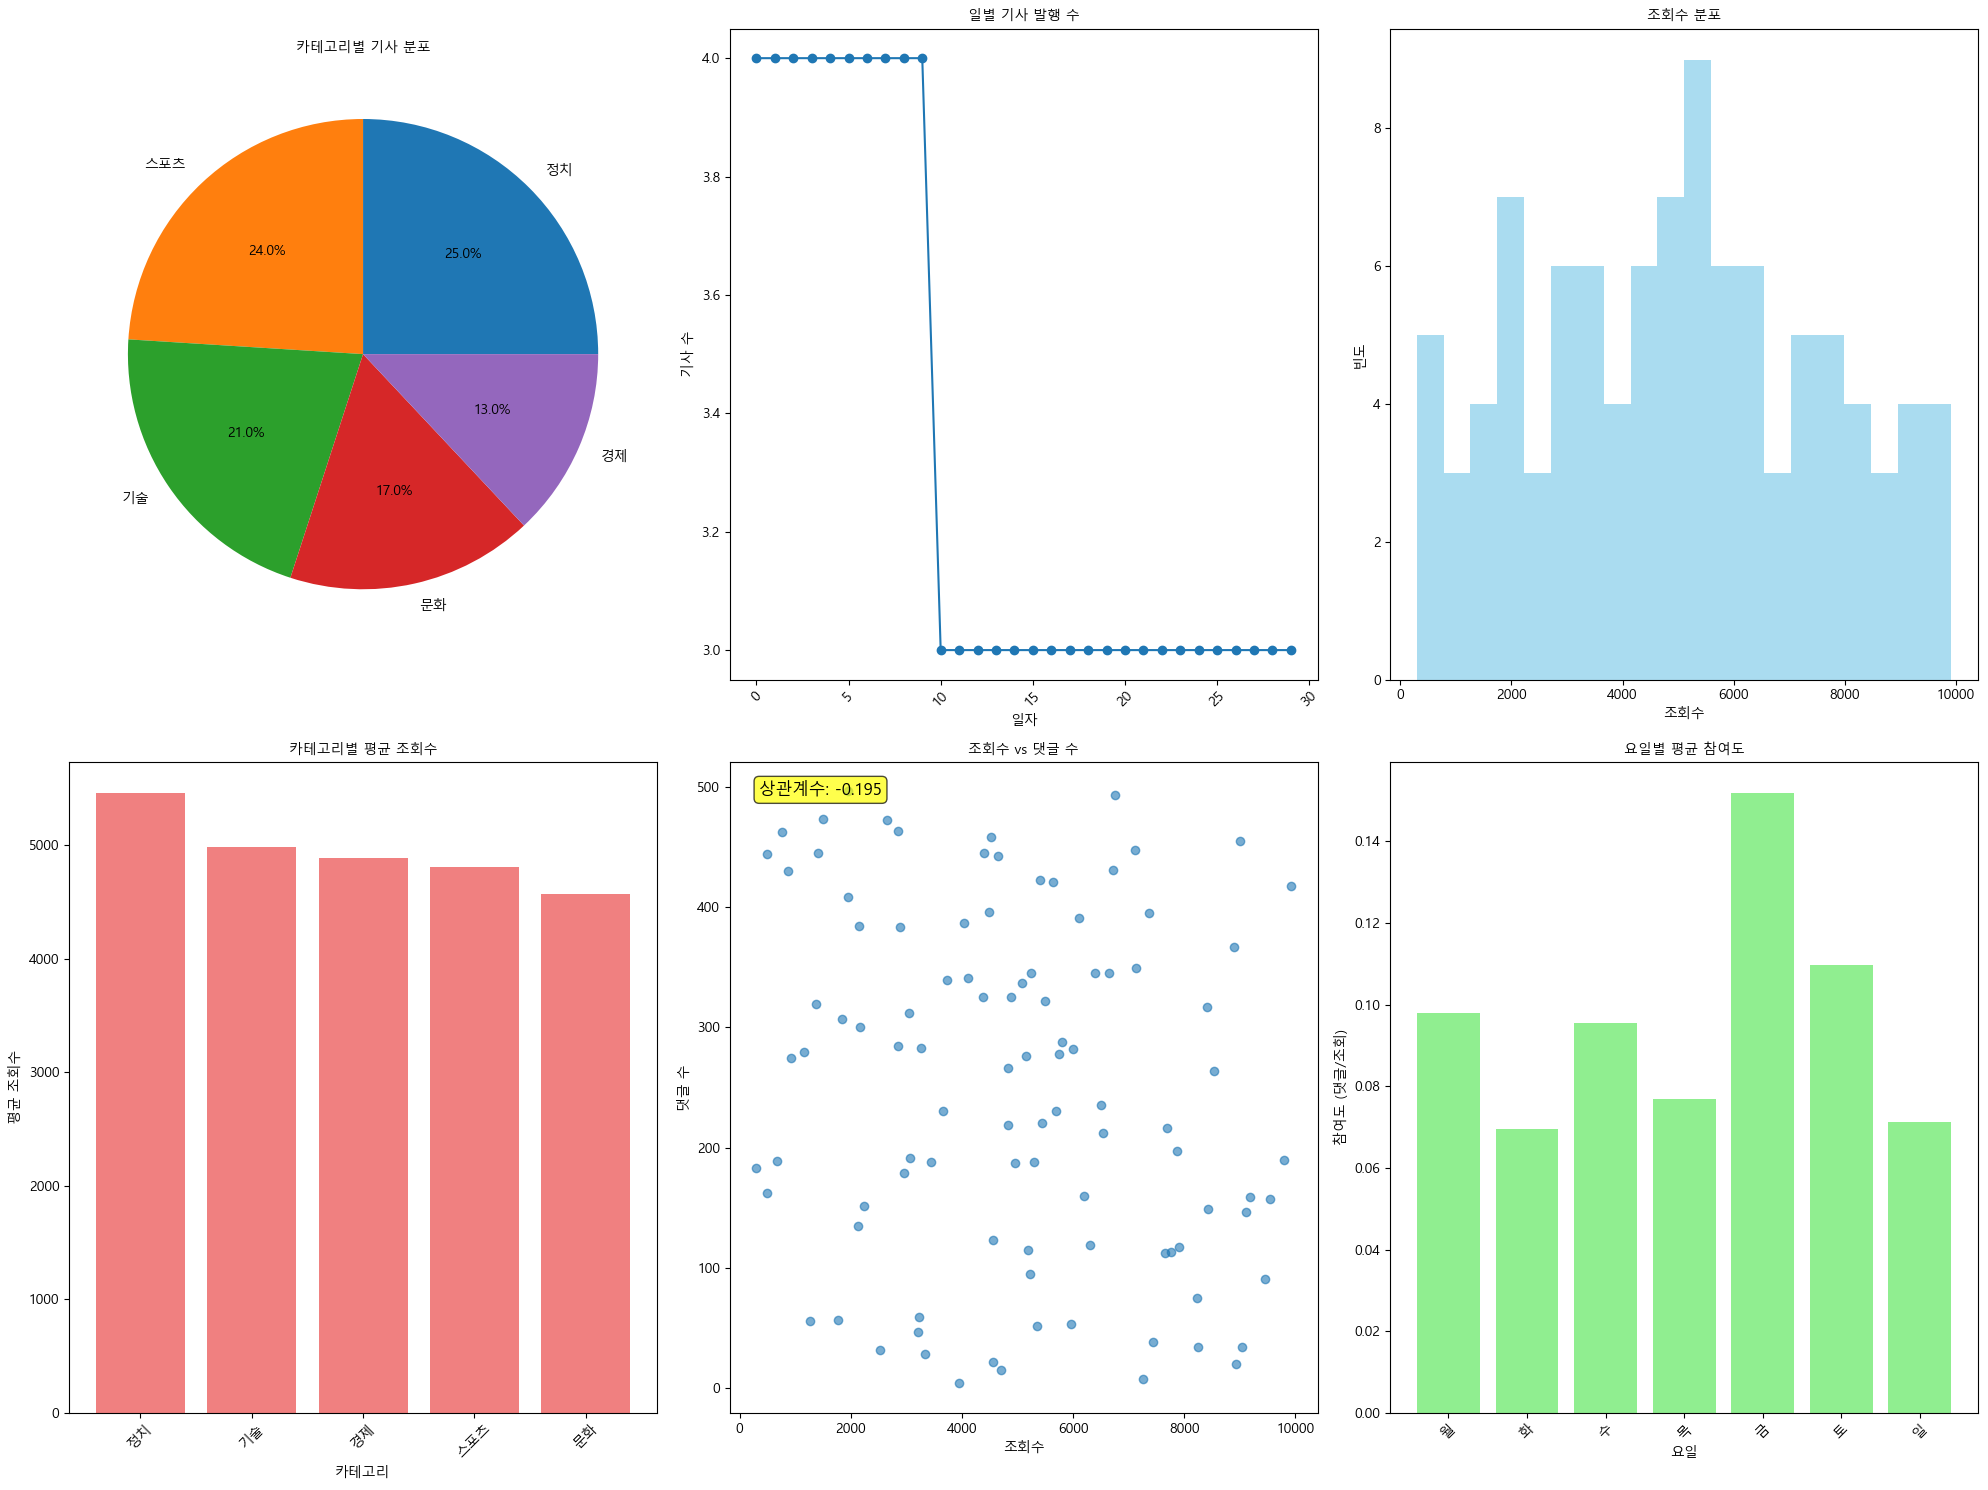

📊 주요 통계 정보:
• 평균 조회수: 4977
• 평균 댓글 수: 249.2
• 가장 인기 있는 카테고리: 정치
• 조회수 상위 10% 기준: 8568


c:\Users\leejuhyung\.conda\envs\ml\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\leejuhyung\.conda\envs\ml\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


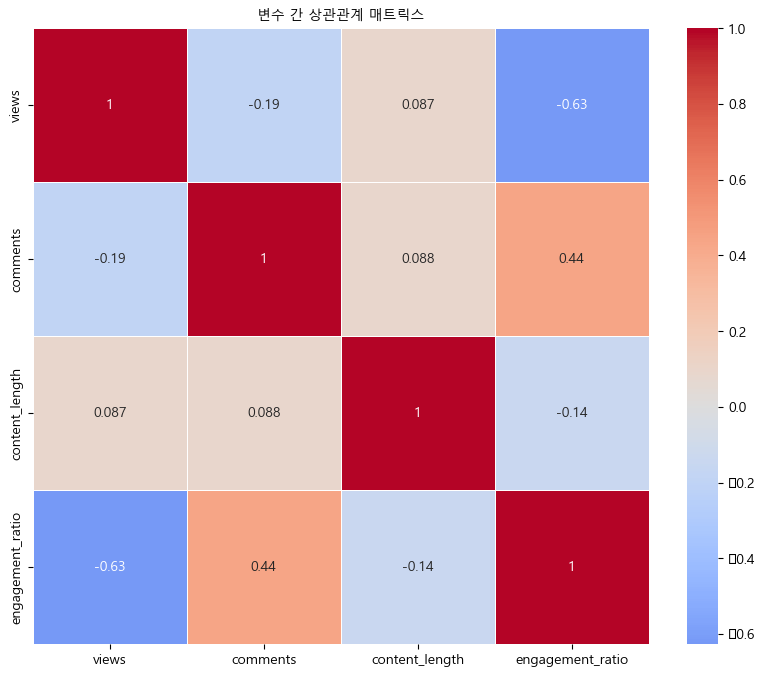

🔍 주요 상관관계:
• views - comments: -0.195
• views - content_length: 0.087
• views - engagement_ratio: -0.627
• comments - content_length: 0.088
• comments - engagement_ratio: 0.437
• content_length - engagement_ratio: -0.143


In [19]:
def exploratory_data_analysis(df):
    mpl.rc('font', family=fontprop.get_name())
    """탐색적 데이터 분석"""
    # 그래프 스타일 설정
    # plt.style.use('default')
    fig = plt.figure(figsize=(20, 15))
    
    # 1. 카테고리별 기사 수
    plt.subplot(2, 3, 1)
    category_counts = df['category'].value_counts()
    
    wedges, texts, autotexts = plt.pie(
        category_counts.values, 
        labels=category_counts.index, 
        autopct='%1.1f%%'
    )
    
    for t in texts + autotexts:
        t.set_fontproperties(fontprop)
    # plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
    plt.title('카테고리별 기사 분포', fontsize=14, fontweight='bold', fontproperties=fontprop)

    # 2. 시간별 기사 발행 추이
    plt.subplot(2, 3, 2)
    daily_counts = df.groupby('date_str').size()
    plt.plot(range(len(daily_counts)), daily_counts.values, marker='o')
    plt.title('일별 기사 발행 수', fontsize=14, fontweight='bold', fontproperties=fontprop)
    plt.xlabel('일자', fontproperties=fontprop)
    plt.ylabel('기사 수', fontproperties=fontprop)
    plt.xticks(rotation=45, fontproperties=fontprop)
    
    # 3. 조회수 분포
    plt.subplot(2, 3, 3)
    plt.hist(df['views'], bins=20, alpha=0.7, color='skyblue')
    plt.title('조회수 분포', fontsize=14, fontweight='bold', fontproperties=fontprop)
    plt.xlabel('조회수', fontproperties=fontprop)
    plt.ylabel('빈도', fontproperties=fontprop)

    # 4. 카테고리별 평균 조회수
    plt.subplot(2, 3, 4)
    category_views = df.groupby('category')['views'].mean().sort_values(ascending=False)
    plt.bar(category_views.index, category_views.values, color='lightcoral')
    plt.title('카테고리별 평균 조회수', fontsize=14, fontweight='bold', fontproperties=fontprop)
    plt.xlabel('카테고리', fontproperties=fontprop)
    plt.ylabel('평균 조회수', fontproperties=fontprop)
    plt.xticks(rotation=45, fontproperties=fontprop)
    
    # 5. 조회수 vs 댓글 수 상관관계
    plt.subplot(2, 3, 5)
    plt.scatter(df['views'], df['comments'], alpha=0.6)
    plt.title('조회수 vs 댓글 수', fontsize=14, fontweight='bold', fontproperties=fontprop)
    plt.xlabel('조회수', fontproperties=fontprop)
    plt.ylabel('댓글 수', fontproperties=fontprop)

    # 상관계수 계산
    correlation = df['views'].corr(df['comments'])
    plt.text(0.05, 0.95, f'상관계수: {correlation:.3f}', 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    # 6. 요일별 참여도 분석
    plt.subplot(2, 3, 6)
    weekday_engagement = df.groupby('weekday')['engagement_ratio'].mean()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_engagement = weekday_engagement.reindex(weekday_order)
    
    plt.bar(range(len(weekday_engagement)), weekday_engagement.values, color='lightgreen')
    plt.title('요일별 평균 참여도', fontsize=14, fontweight='bold', fontproperties=fontprop)
    plt.xlabel('요일', fontproperties=fontprop)
    plt.ylabel('참여도 (댓글/조회)', fontproperties=fontprop)
    plt.xticks(range(len(weekday_engagement)), 
               ['월', '화', '수', '목', '금', '토', '일'], rotation=45, fontproperties=fontprop)
    
    plt.tight_layout()
    plt.show()
    
    # 기본 통계 출력
    print("📊 주요 통계 정보:")
    print(f"• 평균 조회수: {df['views'].mean():.0f}")
    print(f"• 평균 댓글 수: {df['comments'].mean():.1f}")
    print(f"• 가장 인기 있는 카테고리: {df['category'].mode()[0]}")
    print(f"• 조회수 상위 10% 기준: {df['views'].quantile(0.9):.0f}")

def correlation_analysis(df):
    """상관관계 분석"""
    # 수치형 변수들의 상관관계 매트릭스
    numeric_cols = ['views', 'comments', 'content_length', 'engagement_ratio']
    correlation_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('변수 간 상관관계 매트릭스', fontsize=16, fontweight='bold', fontproperties=fontprop)
    plt.show()
    
    print("🔍 주요 상관관계:")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr = correlation_matrix.iloc[i, j]
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"• {var1} - {var2}: {corr:.3f}")

# 분석 실행
exploratory_data_analysis(clean_df)
correlation_analysis(clean_df)

🔍 상위 키워드:
• 제목: 100회
• 기술: 23회
• AI: 23회
• 빅데이터: 23회
• 클라우드: 23회
• 정치: 20회
• 문화: 20회
• 예술: 20회
• 음악: 20회
• 영화: 20회


C:\Users\leejuhyung\AppData\Local\Temp\ipykernel_19324\3211641786.py:53: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leejuhyung\AppData\Local\Temp\ipykernel_19324\3211641786.py:53: UserWarning: Glyph 50892 (\N{HANGUL SYLLABLE WEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leejuhyung\AppData\Local\Temp\ipykernel_19324\3211641786.py:53: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leejuhyung\AppData\Local\Temp\ipykernel_19324\3211641786.py:53: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leejuhyung\AppData\Local\Temp\ipykernel_19324\3211641786.py:53: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leejuhyung\AppData\Local\Temp\ipykernel_19324\3211641786.py:53: UserWarning: Glyph 50864 (\N{HANG

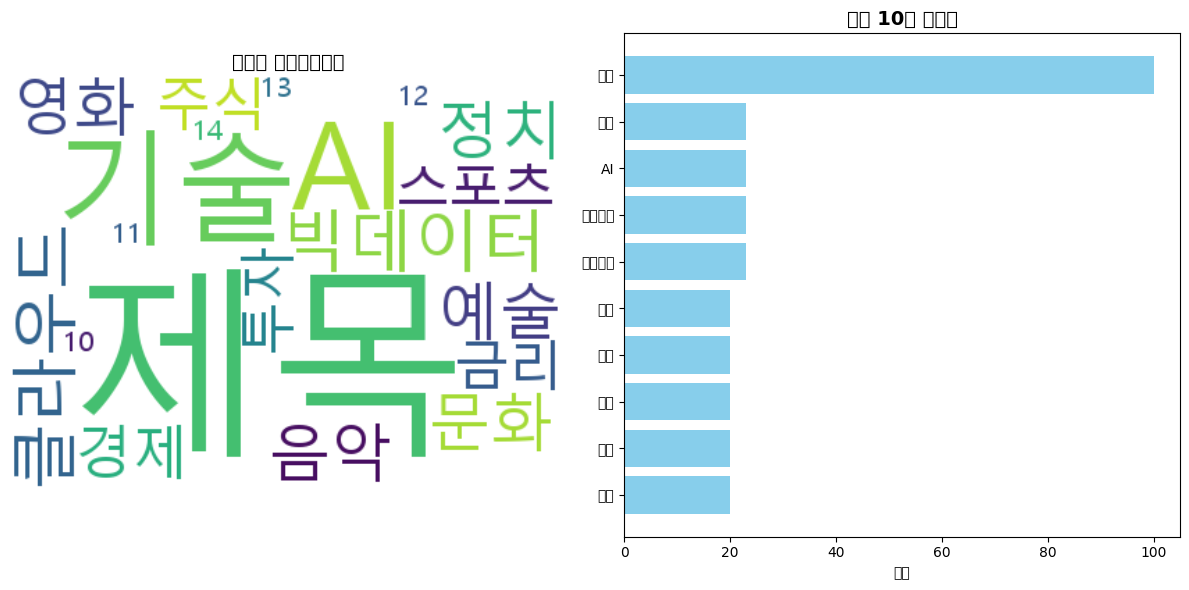

C:\Users\leejuhyung\AppData\Local\Temp\ipykernel_19324\3211641786.py:107: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['category'] == cat]['engagement_ratio'] for cat in df['category'].unique()],
C:\Users\leejuhyung\AppData\Local\Temp\ipykernel_19324\3211641786.py:114: UserWarning: Glyph 45684 (\N{HANGUL SYLLABLE NYU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leejuhyung\AppData\Local\Temp\ipykernel_19324\3211641786.py:114: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leejuhyung\AppData\Local\Temp\ipykernel_19324\3211641786.py:114: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leejuhyung\AppData\Local\Temp\ipykernel_19324\3211641786.py:114: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE G

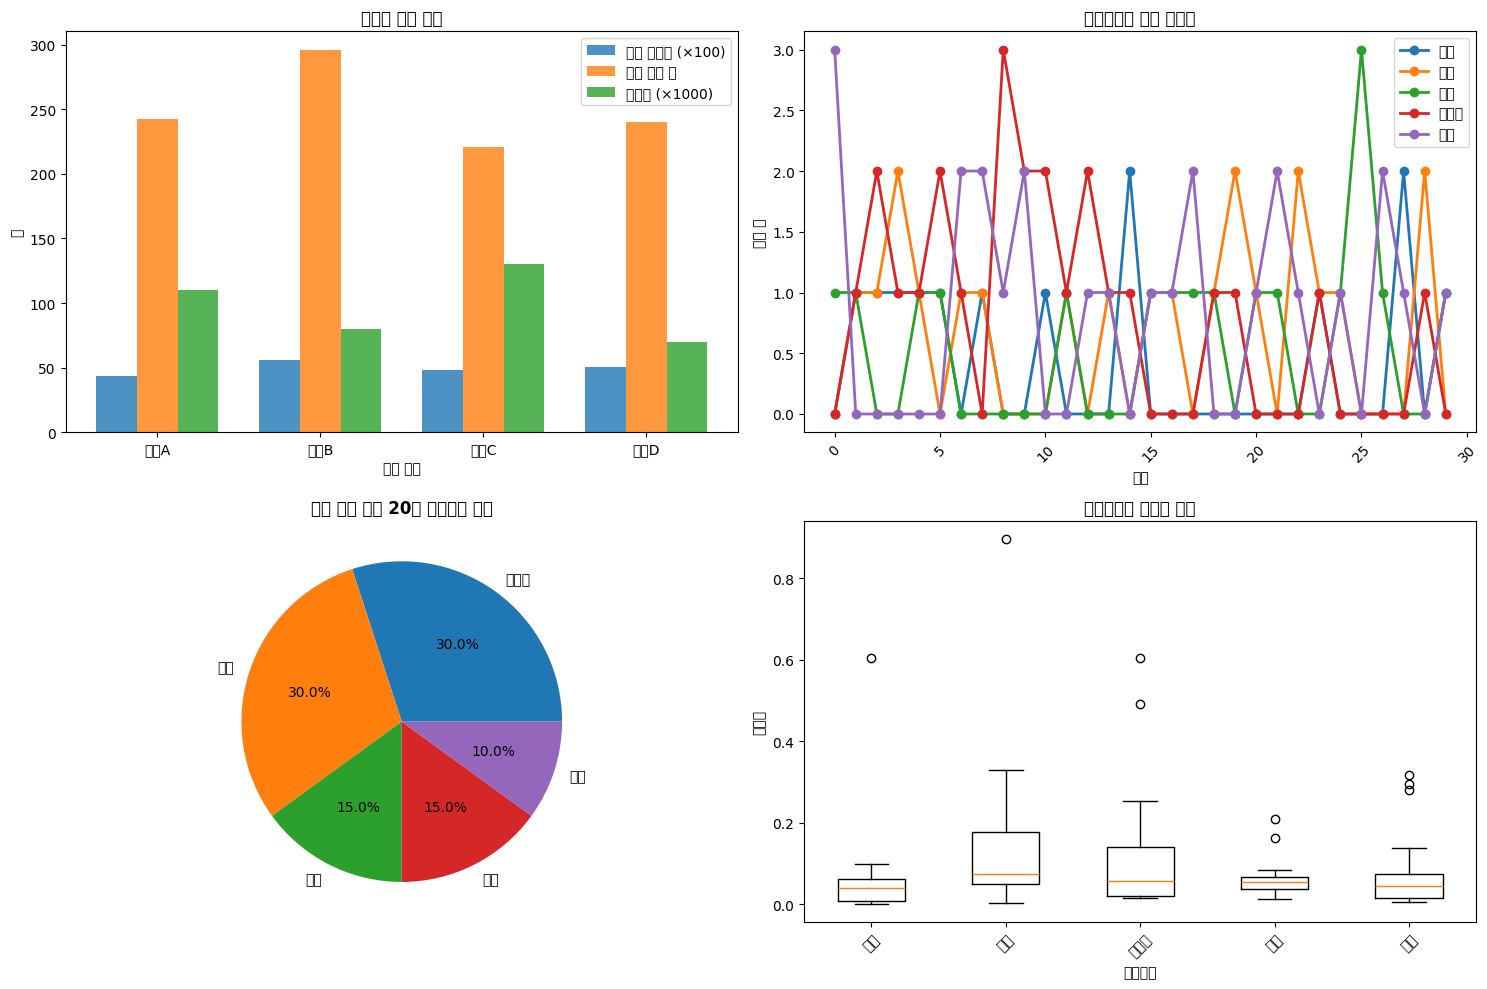

💡 주요 인사이트:
1. '정치' 카테고리가 평균 5461 조회수로 가장 높은 성과를 보입니다.
2. Friday에 발행된 기사의 참여도가 가장 높습니다.
3. 인기 기사의 평균 콘텐츠 길이는 1552자입니다.
4. '뉴스B'가 '뉴스A'보다 1.3배 높은 조회수를 기록했습니다.
📋 분석 리포트:

    📊 웹 크롤링 데이터 분석 리포트

    📈 데이터 개요
    - 분석 기간: 2024-01-01 ~ 2024-01-30
    - 총 기사 수: 100개
    - 카테고리 수: 5개
    - 뉴스 소스 수: 4개

    📊 주요 지표
    - 평균 조회수: 4977
    - 평균 댓글 수: 249.2
    - 평균 참여도: 0.0951
    - 총 조회수: 497,693

    🔍 카테고리별 성과
    - 경제: 기사 13개, 평균 조회수 4885
- 기술: 기사 21개, 평균 조회수 4987
- 문화: 기사 17개, 평균 조회수 4567
- 스포츠: 기사 24개, 평균 조회수 4804
- 정치: 기사 25개, 평균 조회수 5461

💡 핵심 인사이트
1. '정치' 카테고리가 평균 5461 조회수로 가장 높은 성과를 보입니다.
2. Friday에 발행된 기사의 참여도가 가장 높습니다.
3. 인기 기사의 평균 콘텐츠 길이는 1552자입니다.
4. '뉴스B'가 '뉴스A'보다 1.3배 높은 조회수를 기록했습니다.

        📋 권장사항
        1. '정치' 카테고리 콘텐츠 확대
        2. Friday 발행 스케줄 최적화
        3. 평균 1552자 길이의 콘텐츠 작성
        4. 상위 키워드 활용한 제목 최적화

        리포트 생성일: 2025-09-13 02:17:44
        


In [15]:
from datetime import datetime

def advanced_visualization(df):
    """고급 시각화 및 인사이트 도출"""
    
    # 1. 키워드 분석 및 워드클라우드
    keywords = extract_keywords(df['title_clean'])
    
    if keywords:
        print("🔍 상위 키워드:")
        for word, freq in keywords[:10]:
            print(f"• {word}: {freq}회")
        
        # 워드클라우드 생성 (한글 지원 폰트 필요)
        try:
            # 키워드 딕셔너리 생성
            keyword_dict = {word: freq for word, freq in keywords}
            
            plt.figure(figsize=(12, 6))
            
            # 워드클라우드
            plt.subplot(1, 2, 1)
            wordcloud = WordCloud(
                width=400, height=300,
                background_color='white',
                max_words=50,
                colormap='viridis',
                font_path='C:/Windows/Fonts/malgun.ttf'  # Windows 한글 폰트
            ).generate_from_frequencies(keyword_dict)
            
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title('키워드 워드클라우드', fontsize=14, fontweight='bold')
            
        except Exception as e:
            print(f"워드클라우드 생성 실패: {e}")
            plt.subplot(1, 2, 1)
            plt.text(0.5, 0.5, '워드클라우드\n생성 실패', 
                    ha='center', va='center', fontsize=12)
            plt.title('키워드 워드클라우드', fontsize=14, fontweight='bold')
        
        # 키워드 빈도 차트
        plt.subplot(1, 2, 2)
        top_keywords = keywords[:10]
        words, freqs = zip(*top_keywords)
        
        plt.barh(range(len(words)), freqs, color='skyblue')
        plt.yticks(range(len(words)), words)
        plt.xlabel('빈도')
        plt.title('상위 10개 키워드', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        
        plt.tight_layout()
        plt.show()
    
    # 2. 성과 지표 분석
    plt.figure(figsize=(15, 10))
    
    # 2-1. 소스별 성과 비교
    plt.subplot(2, 2, 1)
    source_performance = df.groupby('source').agg({
        'views': 'mean',
        'comments': 'mean',
        'engagement_ratio': 'mean'
    }).round(2)
    
    x = range(len(source_performance))
    width = 0.25
    
    plt.bar([i - width for i in x], source_performance['views']/100, width, 
            label='평균 조회수 (×100)', alpha=0.8)
    plt.bar(x, source_performance['comments'], width, 
            label='평균 댓글 수', alpha=0.8)
    plt.bar([i + width for i in x], source_performance['engagement_ratio']*1000, width, 
            label='참여도 (×1000)', alpha=0.8)
    
    plt.xlabel('뉴스 소스')
    plt.ylabel('값')
    plt.title('소스별 성과 비교', fontweight='bold')
    plt.xticks(x, source_performance.index)
    plt.legend()
    
    # 2-2. 카테고리별 트렌드
    plt.subplot(2, 2, 2)
    category_trend = df.groupby(['date_str', 'category']).size().unstack(fill_value=0)
    
    for category in category_trend.columns:
        plt.plot(range(len(category_trend)), category_trend[category], 
                marker='o', label=category, linewidth=2)
    
    plt.xlabel('날짜')
    plt.ylabel('기사 수')
    plt.title('카테고리별 발행 트렌드', fontweight='bold')
    plt.legend()
    plt.xticks(rotation=45)
    
    # 2-3. 인기 기사 특성 분석
    plt.subplot(2, 2, 3)
    top_articles = df.nlargest(20, 'views')
    category_top = top_articles['category'].value_counts()
    
    plt.pie(category_top.values, labels=category_top.index, autopct='%1.1f%%')
    plt.title('인기 기사 상위 20개 카테고리 분포', fontweight='bold')
    
    # 2-4. 참여도 분포
    plt.subplot(2, 2, 4)
    plt.boxplot([df[df['category'] == cat]['engagement_ratio'] for cat in df['category'].unique()],
                labels=df['category'].unique())
    plt.xlabel('카테고리')
    plt.ylabel('참여도')
    plt.title('카테고리별 참여도 분포', fontweight='bold')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


def generate_insights(df):
    """데이터 기반 인사이트 생성"""
    insights = []
    
    # 1. 가장 성과가 좋은 카테고리
    top_category = df.groupby('category')['views'].mean().idxmax()
    top_category_views = df.groupby('category')['views'].mean().max()
    insights.append(f"'{top_category}' 카테고리가 평균 {top_category_views:.0f} 조회수로 가장 높은 성과를 보입니다.")
    
    # 2. 참여도가 높은 시간대
    best_weekday = df.groupby('weekday')['engagement_ratio'].mean().idxmax()
    insights.append(f"{best_weekday}에 발행된 기사의 참여도가 가장 높습니다.")
    
    # 3. 조회수와 댓글 수의 관계
    correlation = df['views'].corr(df['comments'])
    if correlation > 0.5:
        insights.append(f"조회수와 댓글 수 간에 강한 양의 상관관계({correlation:.3f})가 있습니다.")
    elif correlation > 0.3:
        insights.append(f"조회수와 댓글 수 간에 중간 정도의 양의 상관관계({correlation:.3f})가 있습니다.")
    
    # 4. 콘텐츠 길이 최적화
    optimal_length = df.nlargest(20, 'views')['content_length'].mean()
    insights.append(f"인기 기사의 평균 콘텐츠 길이는 {optimal_length:.0f}자입니다.")
    
    # 5. 소스별 성과 차이
    source_performance = df.groupby('source')['views'].mean()
    best_source = source_performance.idxmax()
    worst_source = source_performance.idxmin()
    performance_ratio = source_performance.max() / source_performance.min()
    insights.append(f"'{best_source}'가 '{worst_source}'보다 {performance_ratio:.1f}배 높은 조회수를 기록했습니다.")
    
    print("💡 주요 인사이트:")
    for i, insight in enumerate(insights, 1):
        print(f"{i}. {insight}")
    
    return insights

def create_final_report(df, insights):
    """최종 분석 리포트 생성"""
    report = f"""
    📊 웹 크롤링 데이터 분석 리포트
    ========================================

    📈 데이터 개요
    - 분석 기간: {df['date'].min().strftime('%Y-%m-%d')} ~ {df['date'].max().strftime('%Y-%m-%d')}
    - 총 기사 수: {len(df):,}개
    - 카테고리 수: {df['category'].nunique()}개
    - 뉴스 소스 수: {df['source'].nunique()}개

    📊 주요 지표
    - 평균 조회수: {df['views'].mean():.0f}
    - 평균 댓글 수: {df['comments'].mean():.1f}
    - 평균 참여도: {df['engagement_ratio'].mean():.4f}
    - 총 조회수: {df['views'].sum():,}

    🔍 카테고리별 성과
    """
        
    category_stats = df.groupby('category').agg({
        'views': ['count', 'mean', 'sum'],
        'comments': 'mean',
        'engagement_ratio': 'mean'
    }).round(2)
    
    for category in category_stats.index:
        report += f"- {category}: 기사 {category_stats.loc[category, ('views', 'count')]}개, "
        report += f"평균 조회수 {category_stats.loc[category, ('views', 'mean')]:.0f}\n"
    
    report += f"\n💡 핵심 인사이트\n"
    for i, insight in enumerate(insights, 1):
        report += f"{i}. {insight}\n"
    
    report += f"""
        📋 권장사항
        1. '{df.groupby('category')['views'].mean().idxmax()}' 카테고리 콘텐츠 확대
        2. {df.groupby('weekday')['engagement_ratio'].mean().idxmax()} 발행 스케줄 최적화
        3. 평균 {df.nlargest(20, 'views')['content_length'].mean():.0f}자 길이의 콘텐츠 작성
        4. 상위 키워드 활용한 제목 최적화

        리포트 생성일: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
        """
        
    # 리포트 파일로 저장
    with open(f"crawling_analysis_report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt", 
            'w', encoding='utf-8') as f:
        f.write(report)
    
    print("📋 분석 리포트:")
    print(report)

# 시각화 및 인사이트 분석 실행
advanced_visualization(clean_df)
insights = generate_insights(clean_df)
create_final_report(clean_df, insights)